In [95]:
from requests import get
from bs4 import BeautifulSoup
from IPython.core.display import clear_output
from time import sleep, time
from random import randint
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud  #pip install wordcloud  <--- Do this in anaconda before you run jupyter notebook
import numpy as np
from statistics import mean
import pandas as pd
import seaborn as sns

In [40]:
final_df = pd.read_csv('polishedfinal_dataframe2.csv')
final_df = final_df.drop(final_df.columns.values[0], axis=1)

In [119]:
final_df['Yelp Bias'] = final_df['Average Ratings'] - final_df['Review_Average']

final_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,https://www.yelp.com/biz/tselogs-san-francisco...,4.5,601,1,3.90,5,2.0,4.0,3.0,5.0,...,5.0,4.0,3.0,5.0,1.0,2.0,4.0,3.90,0.60,False
1,https://www.yelp.com/biz/nicks-crispy-tacos-sa...,4.0,3312,1,3.35,4,3.0,3.0,2.0,3.0,...,5.0,3.0,3.0,3.0,3.0,4.0,4.0,3.35,0.65,False
2,https://www.yelp.com/biz/golden-boy-pizza-san-...,4.5,3448,1,4.40,5,4.0,5.0,4.0,5.0,...,4.0,5.0,4.0,5.0,3.0,5.0,3.0,4.40,0.10,False
3,https://www.yelp.com/biz/house-of-pancakes-san...,4.0,951,1,4.35,5,4.0,5.0,5.0,5.0,...,5.0,5.0,3.0,4.0,4.0,4.0,4.0,4.35,-0.35,False
4,https://www.yelp.com/biz/the-bird-san-francisc...,4.0,1661,1,4.10,5,4.0,4.0,2.0,3.0,...,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.10,-0.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,https://www.yelp.com/biz/phos-spicier-thai-cui...,4.0,72,2,3.35,5,5.0,3.0,1.0,5.0,...,2.0,3.0,2.0,5.0,5.0,3.0,1.0,3.35,0.65,True
797,https://www.yelp.com/biz/udupi-palace-restaura...,3.5,362,2,3.00,5,3.0,1.0,3.0,3.0,...,2.0,4.0,4.0,1.0,4.0,2.0,4.0,3.00,0.50,True
798,https://www.yelp.com/biz/idof-fresh-mediterran...,4.0,44,2,3.80,5,5.0,1.0,5.0,2.0,...,1.0,5.0,5.0,5.0,3.0,4.0,2.0,3.80,0.20,True
799,https://www.yelp.com/biz/arya-bhavan-chicago?o...,3.5,229,2,3.55,5,5.0,4.0,5.0,1.0,...,1.0,1.0,5.0,1.0,5.0,5.0,2.0,3.55,-0.05,True


In [42]:
veg_final_df = final_df[final_df['Veg']==True]
nonveg_final_df = final_df[final_df['Veg']==False]

In [43]:
veg_final_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
297,https://www.yelp.com/biz/the-dosa-brothers-san...,4.5,15,1,4.266667,5,5.0,4.0,3.0,5.0,...,5.0,5.0,NaN,NaN,NaN,NaN,NaN,4.266667,0.233333,True
298,https://www.yelp.com/biz/lucky-creation-vegeta...,4.0,531,1,4.200000,5,5.0,5.0,3.0,4.0,...,5.0,4.0,5.0,3.0,5.0,4.0,5.0,4.200000,-0.200000,True
299,https://www.yelp.com/biz/peasant-pies-noe-vall...,4.0,284,1,4.200000,4,4.0,4.0,4.0,4.0,...,4.0,5.0,1.0,4.0,5.0,4.0,5.0,4.200000,-0.200000,True
300,https://www.yelp.com/biz/halal-shop-san-franci...,4.5,65,1,4.250000,5,5.0,5.0,4.0,5.0,...,5.0,5.0,5.0,5.0,3.0,2.0,1.0,4.250000,0.250000,True
301,https://www.yelp.com/biz/mortys-delicatessen-s...,4.0,519,1,3.700000,5,4.0,2.0,5.0,3.0,...,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.700000,0.300000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,https://www.yelp.com/biz/phos-spicier-thai-cui...,4.0,72,2,3.350000,5,5.0,3.0,1.0,5.0,...,2.0,3.0,2.0,5.0,5.0,3.0,1.0,3.350000,0.650000,True
797,https://www.yelp.com/biz/udupi-palace-restaura...,3.5,362,2,3.000000,5,3.0,1.0,3.0,3.0,...,2.0,4.0,4.0,1.0,4.0,2.0,4.0,3.000000,0.500000,True
798,https://www.yelp.com/biz/idof-fresh-mediterran...,4.0,44,2,3.800000,5,5.0,1.0,5.0,2.0,...,1.0,5.0,5.0,5.0,3.0,4.0,2.0,3.800000,0.200000,True
799,https://www.yelp.com/biz/arya-bhavan-chicago?o...,3.5,229,2,3.550000,5,5.0,4.0,5.0,1.0,...,1.0,1.0,5.0,1.0,5.0,5.0,2.0,3.550000,-0.050000,True


In [44]:
nonveg_final_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,https://www.yelp.com/biz/tselogs-san-francisco...,4.5,601,1,3.90,5,2.0,4.0,3.0,5.0,...,5.0,4.0,3.0,5.0,1.0,2.0,4.0,3.90,0.60,False
1,https://www.yelp.com/biz/nicks-crispy-tacos-sa...,4.0,3312,1,3.35,4,3.0,3.0,2.0,3.0,...,5.0,3.0,3.0,3.0,3.0,4.0,4.0,3.35,0.65,False
2,https://www.yelp.com/biz/golden-boy-pizza-san-...,4.5,3448,1,4.40,5,4.0,5.0,4.0,5.0,...,4.0,5.0,4.0,5.0,3.0,5.0,3.0,4.40,0.10,False
3,https://www.yelp.com/biz/house-of-pancakes-san...,4.0,951,1,4.35,5,4.0,5.0,5.0,5.0,...,5.0,5.0,3.0,4.0,4.0,4.0,4.0,4.35,-0.35,False
4,https://www.yelp.com/biz/the-bird-san-francisc...,4.0,1661,1,4.10,5,4.0,4.0,2.0,3.0,...,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.10,-0.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,https://www.yelp.com/biz/central-kitchen-san-f...,3.5,580,3,3.85,4,2.0,4.0,3.0,4.0,...,5.0,3.0,5.0,5.0,4.0,4.0,1.0,3.85,-0.35,False
293,https://www.yelp.com/biz/johns-grill-san-franc...,3.5,1272,3,3.95,5,2.0,5.0,5.0,3.0,...,5.0,3.0,4.0,3.0,3.0,4.0,4.0,3.95,-0.45,False
294,https://www.yelp.com/biz/altovino-san-francisc...,4.5,75,3,4.55,5,5.0,4.0,4.0,5.0,...,5.0,4.0,5.0,5.0,4.0,5.0,3.0,4.55,-0.05,False
295,https://www.yelp.com/biz/sasa-san-francisco?os...,4.0,184,3,4.50,5,4.0,4.0,4.0,5.0,...,3.0,5.0,4.0,4.0,5.0,5.0,5.0,4.50,-0.50,False


In [45]:
final_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,https://www.yelp.com/biz/tselogs-san-francisco...,4.5,601,1,3.90,5,2.0,4.0,3.0,5.0,...,5.0,4.0,3.0,5.0,1.0,2.0,4.0,3.90,0.60,False
1,https://www.yelp.com/biz/nicks-crispy-tacos-sa...,4.0,3312,1,3.35,4,3.0,3.0,2.0,3.0,...,5.0,3.0,3.0,3.0,3.0,4.0,4.0,3.35,0.65,False
2,https://www.yelp.com/biz/golden-boy-pizza-san-...,4.5,3448,1,4.40,5,4.0,5.0,4.0,5.0,...,4.0,5.0,4.0,5.0,3.0,5.0,3.0,4.40,0.10,False
3,https://www.yelp.com/biz/house-of-pancakes-san...,4.0,951,1,4.35,5,4.0,5.0,5.0,5.0,...,5.0,5.0,3.0,4.0,4.0,4.0,4.0,4.35,-0.35,False
4,https://www.yelp.com/biz/the-bird-san-francisc...,4.0,1661,1,4.10,5,4.0,4.0,2.0,3.0,...,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.10,-0.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,https://www.yelp.com/biz/phos-spicier-thai-cui...,4.0,72,2,3.35,5,5.0,3.0,1.0,5.0,...,2.0,3.0,2.0,5.0,5.0,3.0,1.0,3.35,0.65,True
797,https://www.yelp.com/biz/udupi-palace-restaura...,3.5,362,2,3.00,5,3.0,1.0,3.0,3.0,...,2.0,4.0,4.0,1.0,4.0,2.0,4.0,3.00,0.50,True
798,https://www.yelp.com/biz/idof-fresh-mediterran...,4.0,44,2,3.80,5,5.0,1.0,5.0,2.0,...,1.0,5.0,5.0,5.0,3.0,4.0,2.0,3.80,0.20,True
799,https://www.yelp.com/biz/arya-bhavan-chicago?o...,3.5,229,2,3.55,5,5.0,4.0,5.0,1.0,...,1.0,1.0,5.0,1.0,5.0,5.0,2.0,3.55,-0.05,True


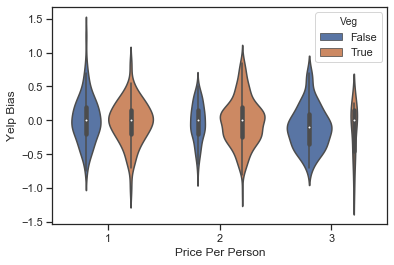

In [114]:
sns.set(style="ticks")
a=sns.violinplot(x=final_df['Price Per Person'], y=final_df['Yelp Bias'], pallete='muted', hue=final_df['Veg'],scale='count')


In [ ]:
#g = sns.FacetGrid(tips, col="time", size=4, aspect=.75)
#g = g.map(sns.violinplot, "sex", "total_bill", "smoker", palette={"No": "b", "Yes": "w"}, inner=None, linewidth=1, scale="area", split=True, width=0.75).despine(left=True)
#g.fig.get_axes()[0].legend(title= 'smoker',loc='top left',labels=["YES","NO"],edgecolor='red',facecolor='blue',ncol=2)
#g.set_axis_labels('lunch','total bill')

Text(0.5, 1.0, 'Non-vegetarian Restaurants')

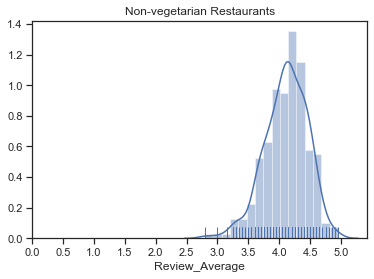

In [230]:
sns.set(style='ticks')
a=sns.distplot(nonveg_final_df['Review_Average'], rug=True)
a.set_xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
#a.set_yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0])
#a.set_xlabel('Yelp Reviews Rating')
#a.set_ylabel('Count')
a.set_title('Non-vegetarian Restaurants')

Text(0.5, 1.0, 'Vegetarian Restaurants')

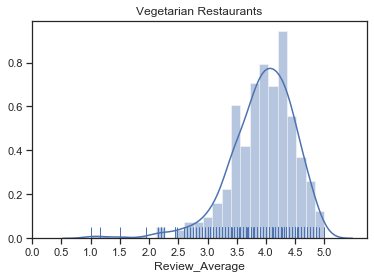

In [229]:
sns.set(style='ticks')
a=sns.distplot(veg_final_df['Review_Average'], rug=True)
a.set_xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
#a.set_yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0])
#a.set_xlabel('Yelp Reviews Rating')
#a.set_ylabel('Count')
a.set_title('Vegetarian Restaurants')

Text(0.5, 1.0, 'Non-vegetarian Restaurants')

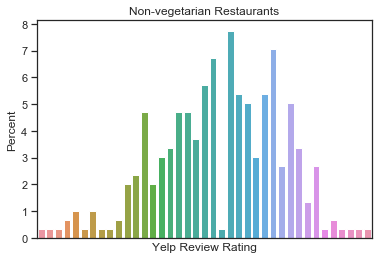

In [130]:
#a=sns.distplot(nonveg_final_df['Review_Average'], rug=True)
a=sns.barplot(x='Review_Average',y='Review_Average', data=nonveg_final_df, estimator=lambda x: len(x) / len(nonveg_final_df) * 100)
a.set(ylabel="Percent")
a.set_xticks(range(0))
#a.set_x(range(0,6))
a.set_xlabel('Yelp Review Rating')
#a.set_ylabel('Count')
a.set_title('Non-vegetarian Restaurants')

Text(0.5, 1.0, 'Vegetarian Restaurants')

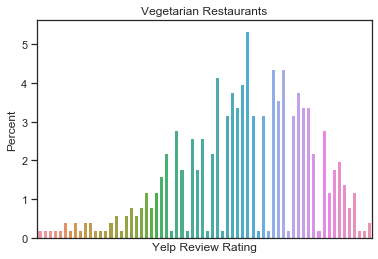

In [124]:
a=sns.barplot(x='Review_Average',y='Review_Average', data=veg_final_df, estimator=lambda x: len(x) / len(veg_final_df) * 100)
a.set(ylabel="Percent")
#a.set_x(range(0,6))
a.set_xlabel('Yelp Review Rating')
#a.set_ylabel('Count')
a.set_title('Vegetarian Restaurants')

Text(0.5, 1.0, 'Vegetarian Restaurants')

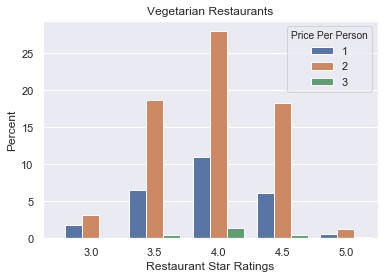

In [216]:
a=sns.barplot(x='Average Ratings',y='Average Ratings', hue='Price Per Person', data=veg_final_df, estimator=lambda x: len(x) / len(veg_final_df) * 100)
a.set(ylabel="Percent")
a.set_xlim(3.25,8.5)
a.set_xlabel('Restaurant Star Ratings')
#a.set_ylabel('Count')
a.set_title('Vegetarian Restaurants')

Text(0.5, 1.0, 'Non-vegetarian Restaurants')

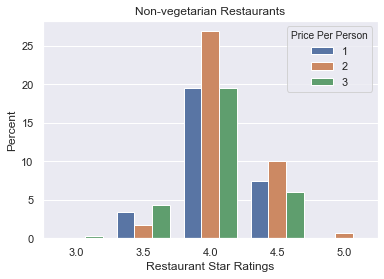

In [217]:
a=sns.barplot(x='Average Ratings',y='Average Ratings', hue='Price Per Person', data=nonveg_final_df, estimator=lambda x: len(x) / len(nonveg_final_df) * 100)
a.set(ylabel="Percent")
#a.set_x(range(0,6))
#a.set_xticklabels(['1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'])
a.set_xlabel('Restaurant Star Ratings')
#a.set_ylabel('Count')
#a.set_xlim([0,10])
a.set_title('Non-vegetarian Restaurants')

Text(0.5, 1.0, 'Non-vegetarian Restaurants')

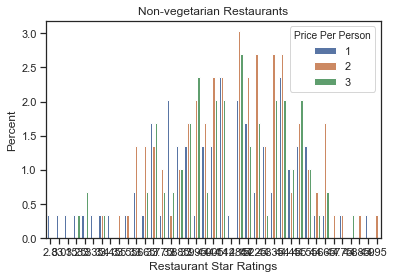

In [231]:
a=sns.barplot(x='Review_Average',y='Review_Average', hue='Price Per Person', data=nonveg_final_df, estimator=lambda x: len(x) / len(nonveg_final_df) * 100)
a.set(ylabel="Percent")
#a.set_x(range(0,6))
#a.set_xticklabels(['1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'])
a.set_xlabel('Restaurant Star Ratings')
#a.set_ylabel('Count')
#a.set_xlim([0,10])
a.set_title('Non-vegetarian Restaurants')